IntSlider(value=11, description='blur-size', max=11, min=1, step=2)

FloatSlider(value=4.0, description='blur-sigma', max=4.0)

Button(description='Reproccess', style=ButtonStyle())

Output()

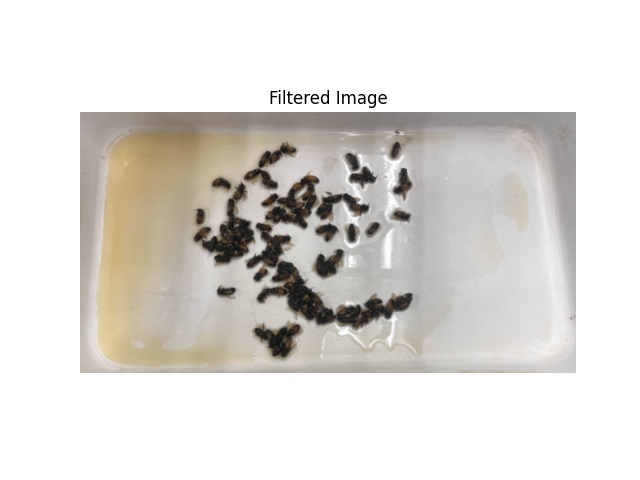

In [33]:
%matplotlib widget
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

ipyout = widgets.Output()

img = cv.imread('/Users/henryshaw/Desktop/Projects/ee-capstone-bee-mite-detect/image_data/bee-image-1.jpg', cv.IMREAD_COLOR_BGR)

BLUR_SIZE = 11
BLUR_SIGMA = 4
x = 0

slider_blur_size = widgets.IntSlider(value=BLUR_SIZE, min=1, max=11, step=2, description='blur-size')
slider_blur_sigma = widgets.FloatSlider(value=BLUR_SIGMA, min=0, max=4, description='blur-sigma')

plt.figure(num='blur-image')

def exec_blur_image(_):
    with ipyout:
        global blurred
        global x
        blur_size = slider_blur_size.value
        blur_sigma = slider_blur_sigma.value
        blurred = cv.GaussianBlur(img, (blur_size, blur_size), blur_sigma)
        plt.figure(num='blur-image')
        plt.clf()
        plt.title('Filtered Image')
        plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
        plt.axis('off')
        # plt.show()
        print(f"exec_blur_image: blur_size={blur_size}, blur_sigma={blur_sigma}")

display(slider_blur_size)
display(slider_blur_sigma)
display(button_exec_blur := widgets.Button(description='Reproccess'))
button_exec_blur.on_click(exec_blur_image)
display(ipyout)
exec_blur_image(None)
plt.show()
